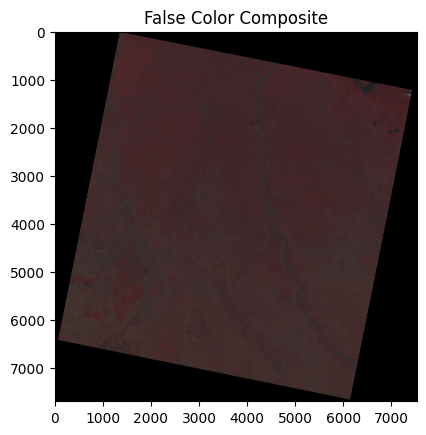

Saving raster to: G:\Manjar\github\rasterData\false.tif
Output data shape: (3, 7691, 7531)


In [1]:
#composite and saving raster
import os
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

parent_dir = os.path.normpath(r"G:\Manjar\github\rasterData")

# File paths for each band
data_1 = "LC08_L2SP_146040_20241018_20241028_02_T1_SR_B1.TIF"
data_2 = "LC08_L2SP_146040_20241018_20241028_02_T1_SR_B2.TIF"
data_3 = "LC08_L2SP_146040_20241018_20241028_02_T1_SR_B3.TIF"
data_4 = "LC08_L2SP_146040_20241018_20241028_02_T1_SR_B4.TIF"
data_5 = "LC08_L2SP_146040_20241018_20241028_02_T1_SR_B5.TIF"
data_6 = "LC08_L2SP_146040_20241018_20241028_02_T1_SR_B6.TIF"
data_7 = "LC08_L2SP_146040_20241018_20241028_02_T1_SR_B7.TIF"

# Function to read each band
def read_band(file):
    path_to_file = os.path.join(parent_dir, file)
    with rio.open(path_to_file) as src:
        return src.read(1)

# Normalize function
def normalize(array):
    array_min, array_max = array.min(), array.max()
    normalized = (array - array_min) / (array_max - array_min)
    return normalized

# Read all bands
band_1 = read_band(data_1)  # Aerosol
band_2 = read_band(data_2)  # Blue
band_3 = read_band(data_3)  # Green
band_4 = read_band(data_4)  # Red
band_5 = read_band(data_5)  # NIR
band_6 = read_band(data_6)  # SWIR1
band_7 = read_band(data_7)  # SWIR2

# Create False color composite (NIR, Red,Green)
false_color_composite = np.dstack((band_5, band_4, band_3))

# Normalize the composite
normalized_composite = normalize(false_color_composite)

# Display the composite image
plt.imshow(normalized_composite)
plt.title("False Color Composite")
plt.show()

# Saving the composite as a raster
# Assuming `true_color_composite` is your 3-band image
with rio.open(os.path.join(parent_dir, data_2)) as src:
    profile = src.profile
    meta = src.meta

# Update metadata for a 3-band image
meta.update({
    "count": 3,  # Number of bands
    "dtype": 'float32'  # Data type of the image
})

# Transpose the composite array to (count, height, width) format for multi-band raster
output_data = np.transpose(normalized_composite, (2, 0, 1))  # (height, width, 3) to (3, height, width)

# Set output file path
output_path = os.path.join(parent_dir, r"G:\Manjar\github\rasterData\false.tif")  # Save it in the same directory with the name fcc.tif
print(f"Saving raster to: {output_path}")
print(f"Output data shape: {output_data.shape}")

# Write the new raster to the file
with rio.open(output_path, "w", **meta) as dataset:
    dataset.write(output_data)
